# Exploratory Data Analysis (EDA) and Feature Engineering

This notebook focuses on:
1. **Exploratory Data Analysis (EDA)**:
   - Understanding data distributions and relationships between features.
   - Identifying correlations and trends relevant to life expectancy.

2. **Feature Engineering**:
   - Cleaning and transforming the dataset.
   - Creating new features to improve predictive power.

The final dataset will be saved for use in the machine learning pipeline.

In [2]:
# Importing all the necessary packages

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

In [3]:
init_df = pd.read_csv('../data/cleaned/combined_all_years_cleaned.csv')

In [4]:
init_df.head()

County           State  mean_life_expectancy  State_FIPS  \
0  Abbeville County  South Carolina             76.554614          45   
1     Acadia Parish       Louisiana             74.133702          22   
2   Accomack County        Virginia             75.798941          51   
3        Ada County           Idaho             80.699209          16   
4      Adair County            Iowa             78.760544          19   

   County_FIPS  disability_rate  white_population  total_population  \
0            1             19.7           17759.0           25387.0   
1            1             17.9           48543.0           61611.0   
2            1             11.8           22586.0           33454.0   
3            1              9.6          363070.0          394961.0   
4            1             13.7            7457.0            7628.0   

   age_60_and_over  poverty_rate  ...  unemployment_rate  \
0             14.7          20.8  ...               13.7   
1             10.9          19.1  ...                8.6   
2             17.5          20.2  ...                7.0   
3              9.3          12.2  ...                8.5   
4             18.6           9.9  ...                4.0   

   median_household_income  asian_population  per_capita_income  \
0                  35067.0           17759.0            17876.0   
1                  38686.0           48543.0            19369.0   
2                  40780.0           22586.0            22909.0   
3                  55499.0          363070.0            27522.0   
4                  47872.0            7457.0            25147.0   

   total_population_race  high_school_only_percentage  median_home_value  \
0                25387.0                         34.8            90300.0   
1                61611.0                         42.2            88900.0   
2                33454.0                         39.3           153800.0   
3               394961.0                         20.8           193300.0   
4                 7628.0                         45.5            96700.0   

   black_population  age_18_and_under_percentage  Year  
0            7144.0                         10.2  2012  
1           11184.0                          9.9  2012  
2            9620.0                          8.0  2012  
3            4057.0                          9.2  2012  
4              11.0                          7.1  2012  

[5 rows x 28 columns]

In [5]:
init_df.describe().transpose()

count           mean            std  \
mean_life_expectancy            24858.0      77.365326       2.560676   
State_FIPS                      24858.0      30.264462      15.167416   
County_FIPS                     24858.0     103.451726     107.666236   
disability_rate                 24858.0      15.703242       4.407639   
white_population                24858.0   74852.649167  202496.761059   
total_population                24858.0  101895.308231  324975.256363   
age_60_and_over                 24858.0      18.872476       6.893613   
poverty_rate                    24858.0      16.226442       6.488762   
housing_cost_burden             24858.0    1136.591319    4659.092710   
bachelors_and_above_percentage  24858.0      20.421945       9.404331   
median_gross_rent               24858.0     716.431330     203.878841   
age_15_to_44_percentage         24858.0      63.070822      21.253285   
gini_index                      24858.0       0.442139       0.035156   
native_american_population      24858.0     834.993322    3430.845650   
less_than_9th_grade_percentage  24858.0       5.771180       3.974378   
health_insurance_rate           24858.0      61.014265      36.135931   
unemployment_rate               24858.0       7.352816       3.585767   
median_household_income         24858.0   48453.157937   13020.962684   
asian_population                24858.0   74852.649167  202496.761059   
per_capita_income               24858.0   25161.743785    6210.782632   
total_population_race           24858.0  101895.308231  324975.256363   
high_school_only_percentage     24858.0      35.123739       7.408203   
median_home_value               24858.0  138599.223590   83524.750617   
black_population                24858.0   12790.059981   55165.858866   
age_18_and_under_percentage     24858.0      14.320927       7.214341   
Year                            24858.0    2015.498753       2.291527   

                                         min           25%            50%  \
mean_life_expectancy               66.047153     75.614112      77.491757   
State_FIPS                          1.000000     18.000000      29.000000   
County_FIPS                         1.000000     35.000000      79.000000   
disability_rate                     3.700000     12.600000      15.300000   
white_population                  215.000000   9337.000000   22309.500000   
total_population                  607.000000  11392.250000   26136.500000   
age_60_and_over                     2.000000     13.600000      17.400000   
poverty_rate                        2.300000     11.600000      15.400000   
housing_cost_burden                 0.000000     69.000000     196.000000   
bachelors_and_above_percentage      2.800000     13.900000      18.200000   
median_gross_rent                  99.000000    587.000000     667.000000   
age_15_to_44_percentage            16.100000     37.700000      76.800000   
gini_index                          0.302300      0.418100       0.439800   
native_american_population          0.000000     31.000000     115.000000   
less_than_9th_grade_percentage      0.000000      3.100000       4.700000   
health_insurance_rate               2.500000     16.800000      84.700000   
unemployment_rate                   0.000000      4.900000       6.900000   
median_household_income         18972.000000  39947.750000   46552.500000   
asian_population                  215.000000   9337.000000   22309.500000   
per_capita_income                8200.000000  21026.250000   24294.500000   
total_population_race             607.000000  11392.250000   26136.500000   
high_school_only_percentage         5.400000     30.400000      35.500000   
median_home_value               19400.000000  88000.000000  115800.000000   
black_population                    0.000000    104.000000     811.500000   
age_18_and_under_percentage         0.000000      8.300000      10.600000   
Year                             2012.000000   2013.000000  

In [6]:
init_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24858 entries, 0 to 24857
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   County                          24858 non-null  object 
 1   State                           24858 non-null  object 
 2   mean_life_expectancy            24858 non-null  float64
 3   State_FIPS                      24858 non-null  int64  
 4   County_FIPS                     24858 non-null  int64  
 5   disability_rate                 24858 non-null  float64
 6   white_population                24858 non-null  float64
 7   total_population                24858 non-null  float64
 8   age_60_and_over                 24858 non-null  float64
 9   poverty_rate                    24858 non-null  float64
 10  housing_cost_burden             24858 non-null  float64
 11  bachelors_and_above_percentage  24858 non-null  float64
 12  median_gross_rent               

In [7]:
init_df.columns

Index(['County', 'State', 'mean_life_expectancy', 'State_FIPS', 'County_FIPS',
       'disability_rate', 'white_population', 'total_population',
       'age_60_and_over', 'poverty_rate', 'housing_cost_burden',
       'bachelors_and_above_percentage', 'median_gross_rent',
       'age_15_to_44_percentage', 'gini_index', 'native_american_population',
       'less_than_9th_grade_percentage', 'health_insurance_rate',
       'unemployment_rate', 'median_household_income', 'asian_population',
       'per_capita_income', 'total_population_race',
       'high_school_only_percentage', 'median_home_value', 'black_population',
       'age_18_and_under_percentage', 'Year'],
      dtype='object')

In [8]:
# Now let us drop the columns that are not relevant for our data analysis
df = init_df.drop(columns=['State_FIPS', 'County_FIPS'])
df.head()

County           State  mean_life_expectancy  disability_rate  \
0  Abbeville County  South Carolina             76.554614             19.7   
1     Acadia Parish       Louisiana             74.133702             17.9   
2   Accomack County        Virginia             75.798941             11.8   
3        Ada County           Idaho             80.699209              9.6   
4      Adair County            Iowa             78.760544             13.7   

   white_population  total_population  age_60_and_over  poverty_rate  \
0           17759.0           25387.0             14.7          20.8   
1           48543.0           61611.0             10.9          19.1   
2           22586.0           33454.0             17.5          20.2   
3          363070.0          394961.0              9.3          12.2   
4            7457.0            7628.0             18.6           9.9   

   housing_cost_burden  bachelors_and_above_percentage  ...  \
0                221.0                            11.7  ...   
1                339.0                             9.3  ...   
2                199.0                            17.3  ...   
3               4338.0                            37.8  ...   
4                 43.0                            11.5  ...   

   unemployment_rate  median_household_income  asian_population  \
0               13.7                  35067.0           17759.0   
1                8.6                  38686.0           48543.0   
2                7.0                  40780.0           22586.0   
3                8.5                  55499.0          363070.0   
4                4.0                  47872.0            7457.0   

   per_capita_income  total_population_race  high_school_only_percentage  \
0            17876.0                25387.0                         34.8   
1            19369.0                61611.0                         42.2   
2            22909.0                33454.0                         39.3   
3            27522.0               394961.0                         20.8   
4            25147.0                 7628.0                         45.5   

   median_home_value  black_population  age_18_and_under_percentage  Year  
0            90300.0            7144.0                         10.2  2012  
1            88900.0           11184.0                          9.9  2012  
2           153800.0            9620.0                          8.0  2012  
3           193300.0            4057.0                          9.2  2012  
4            96700.0              11.0                          7.1  2012  

[5 rows x 26 columns]

In [9]:
important_features = [
    'mean_life_expectancy',             
    'median_household_income',
    'poverty_rate',
    'health_insurance_rate',
    'bachelors_and_above_percentage',
    'age_60_and_over',
    'disability_rate',
    'gini_index',
    'median_home_value',
    'housing_cost_burden',
    'per_capita_income'
]

<Figure size 1200x1000 with 0 Axes>

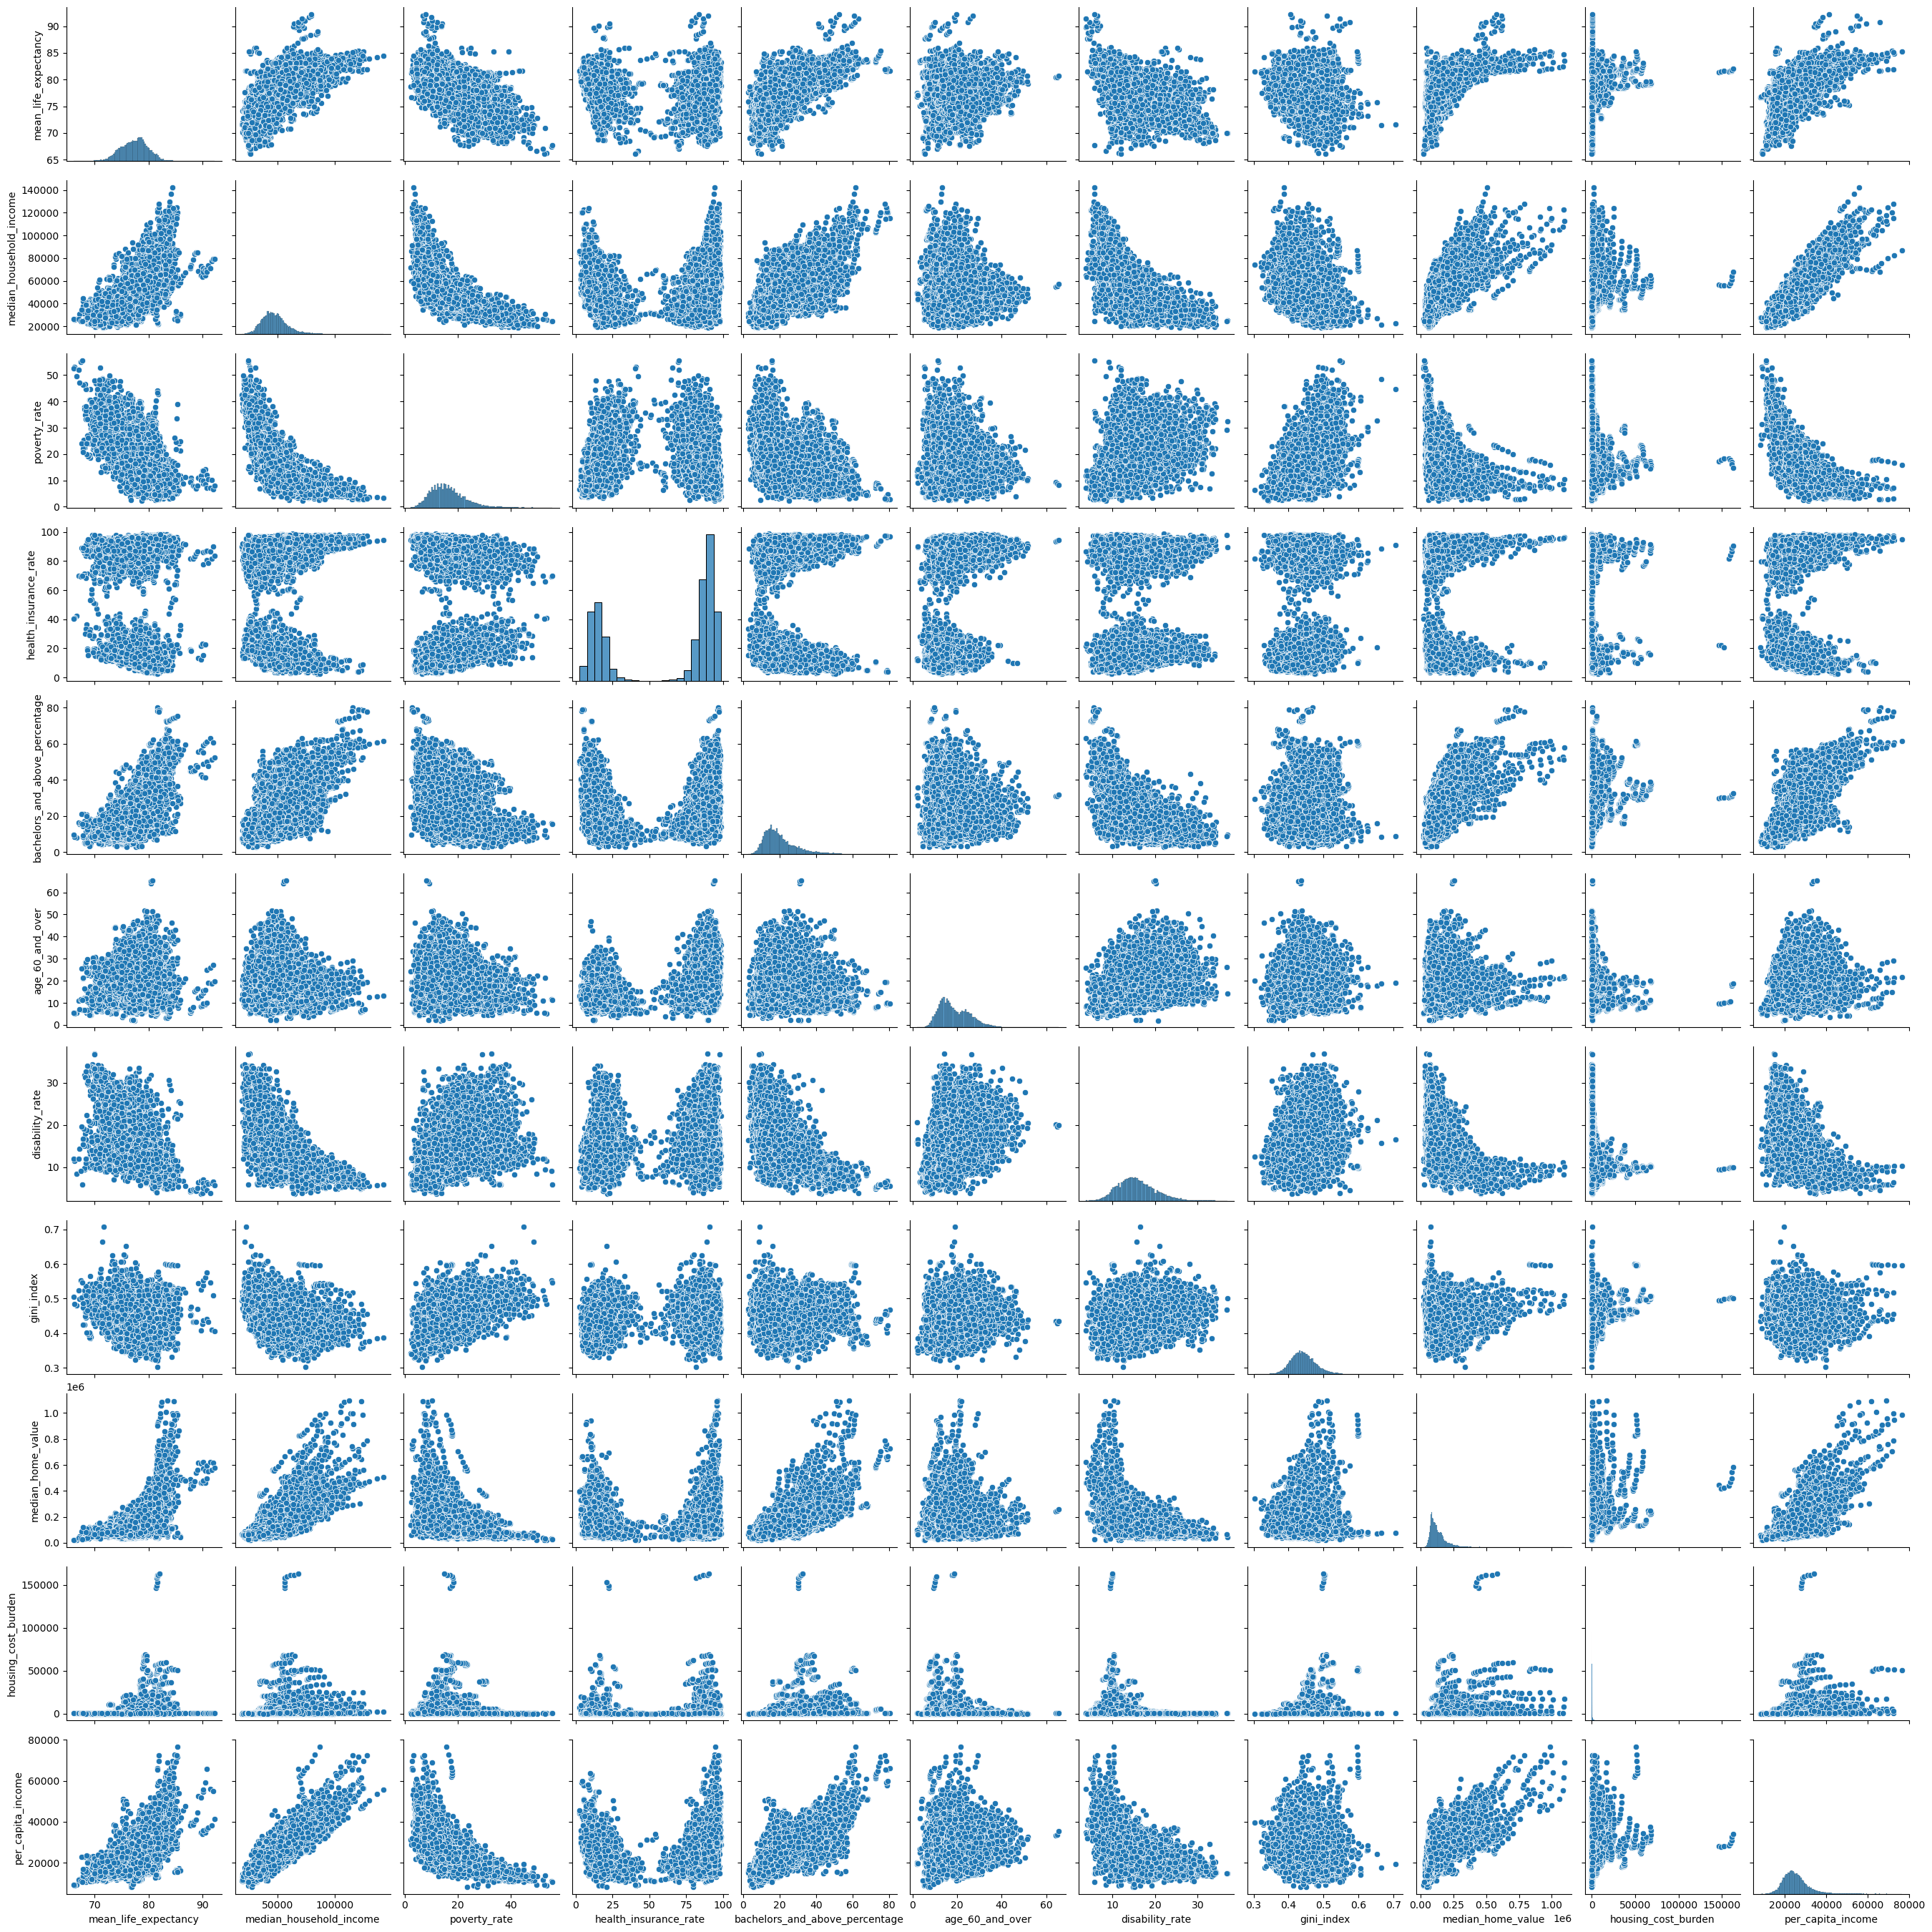

In [10]:
plt.figure(figsize=(12,10))
sns.pairplot(data = df[important_features])
plt.savefig('../outputs/pairplot.png')

**There are several interesting observations to be made here:**

**1) Features like median_household_income and per_capita_income seem to have a strong positive relationship with mean_life_expectancy.**

**2) In contrast, features like poverty_rate, disability_rate, and gini_index seem to have a negative relationship (as expected).**

**3) The median_household_income and per_capita_income seem to be strongly correlated with each other. We might drop one of these features later to prevent overfitting.**

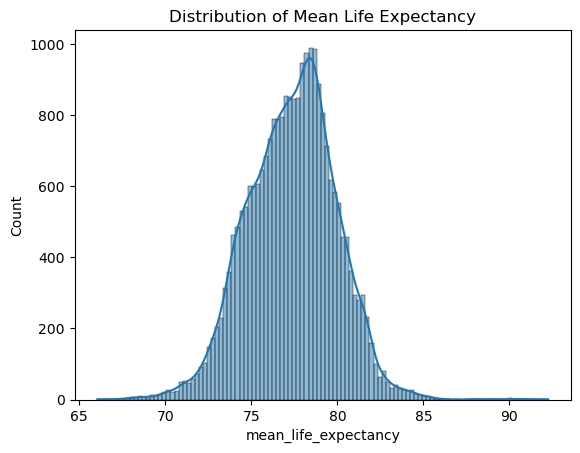

In [12]:
sns.histplot(data = df, x = df['mean_life_expectancy'], kde=True)
plt.title('Distribution of Mean Life Expectancy')
plt.savefig('../outputs/disribution_life_expectancy.png')
plt.show()

**The distrinution for mean_life_expectancy seems to be normally distributed and roughly symmetrical, although it seems to be slightly left-skewed, suggesting that a few counties might have unusually low life expectancies.**

**Let's look at the counties that have life expectancies below 70 and above 80. This will help us identify the outliers in the data set.**

In [14]:
low_life_exp = df[df['mean_life_expectancy'] < 70]
low_life_exp

County          State  mean_life_expectancy  disability_rate  \
1831    McDowell County  West Virginia             68.878692             31.8   
2432   Roosevelt County        Montana             69.669884             11.3   
2577     Shannon County   South Dakota             66.686695              8.5   
2614       Sioux County   North Dakota             69.180948             12.6   
2773        Todd County   South Dakota             68.467172             16.2   
...                 ...            ...                   ...              ...   
23954      Perry County       Kentucky             68.744949             30.5   
23963   Petersburg City       Virginia             68.542338             22.4   
24363      Sioux County   North Dakota             68.402908             12.0   
24522       Todd County   South Dakota             67.696662              5.8   
24568      Union County        Florida             67.777653             15.4   

       white_population  total_population  age_60_and_over  poverty_rate  \
1831            19511.0           21966.0             14.4          33.5   
2432             3836.0           10477.0              9.4          21.9   
2577              486.0           13683.0              5.3          49.5   
2614              529.0            4193.0              6.0          44.8   
2773             1014.0            9711.0              5.5          44.6   
...                 ...               ...              ...           ...   
23954           25529.0           26624.0             23.4          26.1   
23963            5473.0           31362.0             23.9          24.1   
24363             581.0            4373.0             11.9          38.2   
24522             849.0           10195.0             11.3          55.5   
24568           11268.0           15303.0             21.2          20.8   

       housing_cost_burden  bachelors_and_above_percentage  ...  \
1831                 102.0                             5.4  ...   
2432                  70.0                            13.8  ...   
2577                  82.0                             7.9  ...   
2614                  11.0                             9.2  ...   
2773                 124.0                            12.9  ...   
...                    ...                             ...  ...   
23954                 97.0                            14.4  ...   
23963                516.0                            19.8  ...   
24363                 23.0                            15.0  ...   
24522                 74.0                            15.6  ...   
24568                 89.0                             9.2  ...   

       unemployment_rate  median_household_income  asian_population  \
1831                10.3                  22972.0           19511.0   
2432                 3.3                  40146.0            3836.0   
2577                23.2                  26282.0             486.0   
2614                21.3                  30799.0             529.0   
2773                26.4                  30972.0            1014.0   
...                  ...                      ...               ...   
23954               11.9                  33640.0           25529.0   
23963               11.7                  38679.0            5473.0   
24363               18.7                  38939.0             581.0   
24522                7.3                  24331.0             849.0   
24568                6.9                  44270.0           11268.0   

       per_capita_income  total_population_race  high_school_only_percentage  \
1831             13917.0                21966.0                         36.7   
2432             17758.0                10477.0                         40.8   
2577              9136.0                13683.0                         37.0   
2614             14265.0                 4193.0                         32.5   
2773             11417.0                 9711.0                         2

**Let's look at which states have the most number of counties with a very low life expectancy.**

In [16]:
low_life_exp['State'].value_counts()

State
Kentucky         25
South Dakota     19
West Virginia    11
Virginia         10
North Dakota      8
Florida           8
Montana           7
Alaska            3
Name: count, dtype: int64

In [17]:
high_life_exp = df[df['mean_life_expectancy'] > 80]
high_life_exp

County       State  mean_life_expectancy  \
3                    Ada County       Idaho             80.699209   
8                  Adams County    Colorado             80.065177   
9                  Adams County       Idaho             80.651258   
20               Addison County     Vermont             80.716196   
25               Alameda County  California             81.591711   
...                         ...         ...                   ...   
24832  Yakutat City and Borough      Alaska             81.545654   
24834            Yamhill County      Oregon             80.182842   
24841    Yellow Medicine County   Minnesota             80.221016   
24844               Yolo County  California             81.315994   
24853               Yuma County     Arizona             81.435390   

       disability_rate  white_population  total_population  age_60_and_over  \
3                  9.6          363070.0          394961.0              9.3   
8                  9.5          351099.0          442996.0              7.3   
9                 22.7            3780.0            3976.0             23.3   
20                12.3           35217.0           36814.0             12.7   
25                 9.2          695847.0         1515136.0              9.8   
...                ...               ...               ...              ...   
24832             11.1             293.0             649.0             21.6   
24834             15.4           91772.0          104831.0             23.2   
24841             13.1            9090.0            9814.0             28.4   
24844              9.6          150617.0          217352.0             17.0   
24853             12.0          159864.0          209468.0             23.5   

       poverty_rate  housing_cost_burden  bachelors_and_above_percentage  ...  \
3              12.2               4338.0                            37.8  ...   
8              14.2               5251.0                            20.5  ...   
9              13.8                 28.0                            20.4  ...   
20             11.1                369.0                            31.5  ...   
25             12.0              21987.0                            41.1  ...   
...             ...                  ...                             ...  ...   
24832           7.4                  2.0                            22.6  ...   
24834          12.1                701.0                            26.9  ...   
24841          11.8                103.0                            17.2  ...   
24844          19.1               3179.0                            41.4  ...   
24853          19.4               1669.0                            15.0  ...   

       unemployment_rate  median_household_income  asian_population  \
3                    8.5                  55499.0          363070.0   
8                    9.5                  56633.0          351099.0   
9                   10.0                  35756.0            3780.0   
20                   6.9                  57785.0           35217.0   
25                   9.9                  71516.0          695847.0   
...                  ...                      ...               ...   
24832                5.8                  71607.0             293.0   
24834                4.1                  63902.0           91772.0   
24841                2.4                  59210.0            9090.0   
24844                6.2                  70228.0          150617.0   
24853               10.0                  45243.0          159864.0   

       per_capita_income  total_population_race  high_school_only_percentage  \
3                27522.0               394961.0                         20.8   
8                24357.0               442996.0                         30.4   
9                20462.0                 3976.0                         36.6   
20               28550.0                36814.0                         35.0   
25               3543

**Now doing the same with the states with many high life expectancy counties.**

In [19]:
high_life_exp['State'].value_counts()

State
Minnesota         392
Colorado          234
California        203
Iowa              200
Wisconsin         185
Nebraska          172
South Dakota      164
Virginia          158
Washington        141
New York          139
Texas             131
North Dakota      120
Florida           109
New Jersey         82
Oregon             81
Idaho              80
Montana            75
Michigan           71
Pennsylvania       69
Illinois           68
Utah               67
Massachusetts      64
Alaska             61
Connecticut        51
Georgia            47
North Carolina     43
Maryland           42
Arizona            35
Vermont            33
Hawaii             31
Wyoming            31
Kansas             30
Ohio               30
Rhode Island       24
New Hampshire      21
New Mexico         20
Missouri           19
Nevada             15
Indiana            13
Maine               9
South Carolina      8
Tennessee           8
Alabama             2
Name: count, dtype: int64

**Let's try to find the county that has the highest mean life expectancy.**

In [21]:
df[df['mean_life_expectancy'] == df['mean_life_expectancy'].max()]

County     State  mean_life_expectancy  disability_rate  \
24444  Summit County  Colorado             92.253858              5.7   

       white_population  total_population  age_60_and_over  poverty_rate  \
24444           27978.0           30649.0             19.6           8.0   

       housing_cost_burden  bachelors_and_above_percentage  ...  \
24444                464.0                            52.4  ...   

       unemployment_rate  median_household_income  asian_population  \
24444                3.2                  79277.0           27978.0   

       per_capita_income  total_population_race  high_school_only_percentage  \
24444            41281.0                30649.0                         18.0   

       median_home_value  black_population  age_18_and_under_percentage  Year  
24444           579600.0             342.0                         16.2  2019  

[1 rows x 26 columns]

**Now the one with the lowest life expectancy.**

In [23]:
df[df['mean_life_expectancy'] == df['mean_life_expectancy'].min()]

County         State  mean_life_expectancy  disability_rate  \
8796  Shannon County  South Dakota             66.047153             12.0   

      white_population  total_population  age_60_and_over  poverty_rate  \
8796             617.0           14005.0              5.4          52.6   

      housing_cost_burden  bachelors_and_above_percentage  ...  \
8796                 75.0                             9.7  ...   

      unemployment_rate  median_household_income  asian_population  \
8796               27.1                  26383.0             617.0   

      per_capita_income  total_population_race  high_school_only_percentage  \
8796             9226.0                14005.0                         33.1   

      median_home_value  black_population  age_18_and_under_percentage  Year  
8796            20000.0              18.0                         13.1  2014  

[1 rows x 26 columns]

**Notice how the poverty rate in this county is 52.6%, a significantly high number. The unemployment rate also seems to be quite high. Later in the project when we do feature rankings, we will see how influential these variables are when predicting mean life expectancy.**

**Now let's try to make the box plot to see the distribution of mean life expectancy across different states.**

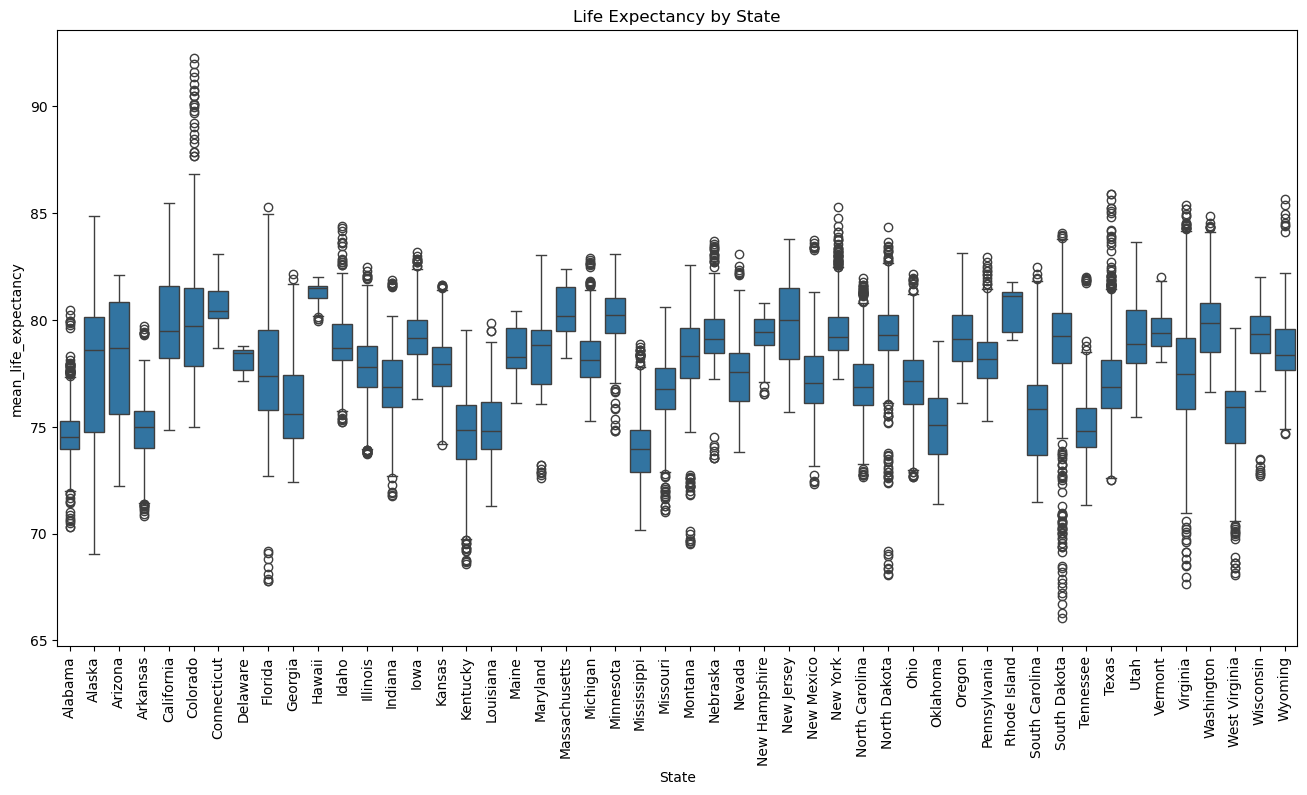

In [26]:
plt.figure(figsize=(16,8))
states_order = sorted(df['State'].unique())
sns.boxplot(data=df, x='State', y='mean_life_expectancy', order = states_order)
plt.xticks(rotation=90)
plt.title("Life Expectancy by State")
plt.savefig('../outputs/boxplot.png', bbox_inches='tight')
plt.show()

**Note: There seems to be a wide variation in life expectancy across different states. Some states (e.g., Hawaii, California, and Minnesota) have higher medians and fewer outliers on the lower end.States like Kentucky, West Virginia, and South Dakota have lower medians and many outliers below the 25th percentile, suggesting more counties with significantly lower life expectancy. States such as Mississippi, Kentucky, and West Virginia show many outliers on the lower end, which aligns with their counties having some of the lowest life expectancies.**

**Similarly, let's try to make the box plot for counties with very high and very low life expectancies.**

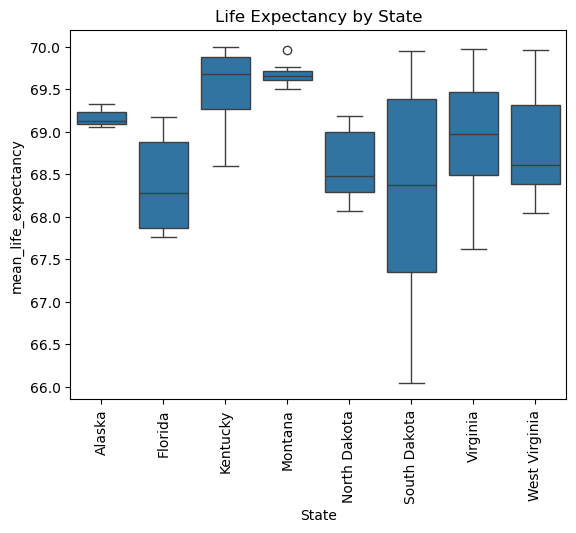

In [29]:
states_order = sorted(low_life_exp['State'].unique())
sns.boxplot(data=low_life_exp, x='State', y='mean_life_expectancy', order = states_order)
plt.xticks(rotation=90)
plt.title("Life Expectancy by State")
plt.savefig('../outputs/boxplot_low_life_exp.png', bbox_inches='tight')
plt.show()

**Note: South Dakota shows the widest range of life expectancy values, indicating significant variation across counties in the state. The presence of outliers in Montana suggests that some counties deviate significantly from the overall state trend, which could be something that could warrant further investigation.**

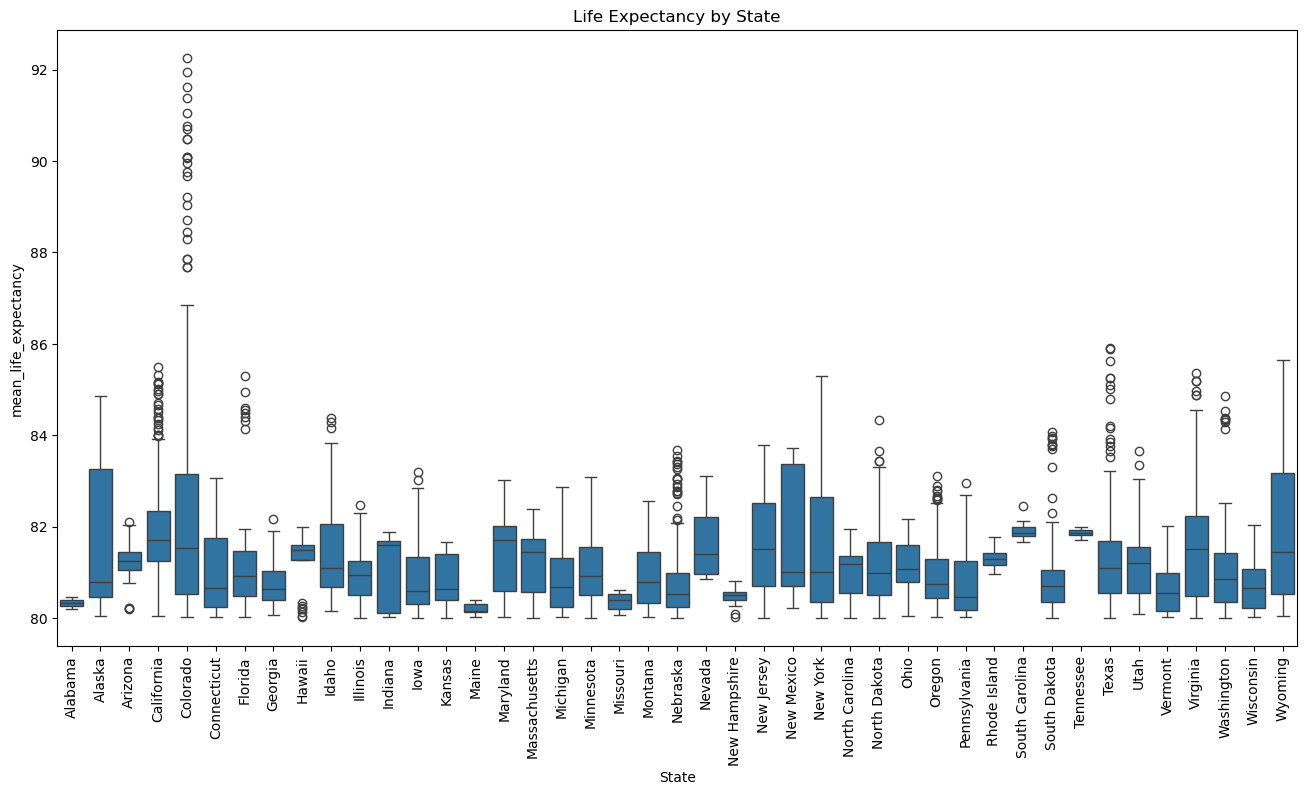

In [31]:
plt.figure(figsize=(16,8))
states_order = sorted(high_life_exp['State'].unique())
sns.boxplot(data= high_life_exp, x='State', y='mean_life_expectancy', order = states_order)
plt.xticks(rotation=90)
plt.title("Life Expectancy by State")
plt.savefig('../outputs/boxplot_high_life_exp.png', bbox_inches='tight')
plt.show()

**Note: California and Colorado seem to have high upper bounds, with some counties showing exceptionally high life expectancy. Interesting.**

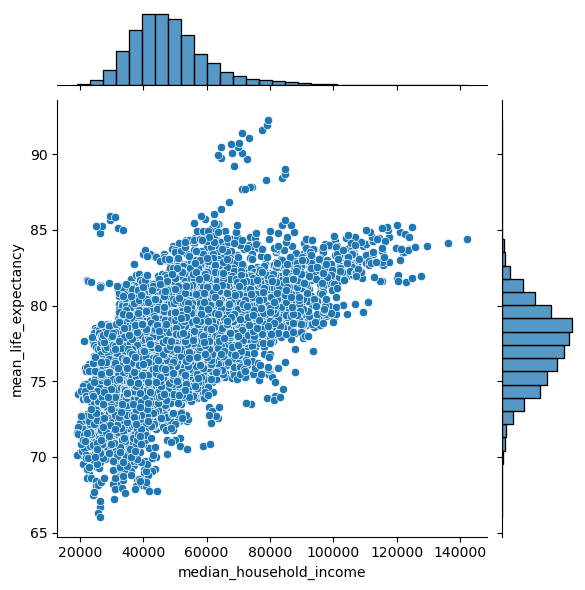

In [61]:
sns.jointplot(data=df, x='median_household_income', y='mean_life_expectancy', kind="scatter", marginal_kws=dict(bins=30, fill=True))
plt.savefig('../outputs/jointplot_mhi_mle.png', bbox_inches = 'tight')
plt.show()

**Let's now try to find the correlation between the different features.**

In [67]:
df.columns

Index(['County', 'State', 'mean_life_expectancy', 'disability_rate',
       'white_population', 'total_population', 'age_60_and_over',
       'poverty_rate', 'housing_cost_burden', 'bachelors_and_above_percentage',
       'median_gross_rent', 'age_15_to_44_percentage', 'gini_index',
       'native_american_population', 'less_than_9th_grade_percentage',
       'health_insurance_rate', 'unemployment_rate', 'median_household_income',
       'asian_population', 'per_capita_income', 'total_population_race',
       'high_school_only_percentage', 'median_home_value', 'black_population',
       'age_18_and_under_percentage', 'Year'],
      dtype='object')

In [69]:
selected_features = ['mean_life_expectancy', 'disability_rate',
       'total_population', 'age_60_and_over',
       'poverty_rate', 'housing_cost_burden', 'bachelors_and_above_percentage',
       'median_gross_rent', 'age_15_to_44_percentage', 'gini_index', 'less_than_9th_grade_percentage',
       'health_insurance_rate', 'unemployment_rate', 'median_household_income',
       'per_capita_income', 'high_school_only_percentage', 'median_home_value',
       'age_18_and_under_percentage']

In [71]:
df[selected_features].corr()

mean_life_expectancy  disability_rate  \
mean_life_expectancy                        1.000000        -0.635294   
disability_rate                            -0.635294         1.000000   
total_population                            0.200416        -0.233820   
age_60_and_over                             0.019345         0.309915   
poverty_rate                               -0.649895         0.504959   
housing_cost_burden                         0.178472        -0.199447   
bachelors_and_above_percentage              0.635201        -0.589465   
median_gross_rent                           0.477932        -0.498278   
age_15_to_44_percentage                     0.040628        -0.042840   
gini_index                                 -0.280322         0.223957   
less_than_9th_grade_percentage             -0.305945         0.269054   
health_insurance_rate                      -0.037553         0.045295   
unemployment_rate                          -0.444288         0.359912   
median_household_income                     0.649629        -0.665745   
per_capita_income                           0.659090        -0.565927   
high_school_only_percentage                -0.459291         0.447915   
median_home_value                           0.582302        -0.475105   
age_18_and_under_percentage                -0.041557        -0.079752   

                                total_population  age_60_and_over  \
mean_life_expectancy                    0.200416         0.019345   
disability_rate                        -0.233820         0.309915   
total_population                        1.000000        -0.143725   
age_60_and_over                        -0.143725         1.000000   
poverty_rate                           -0.067900        -0.131895   
housing_cost_burden                     0.971019        -0.127011   
bachelors_and_above_percentage          0.325628        -0.060017   
median_gross_rent                       0.410918        -0.122802   
age_15_to_44_percentage                 0.009098        -0.729580   
gini_index                              0.145136         0.045865   
less_than_9th_grade_percentage         -0.002309        -0.204208   
health_insurance_rate                   0.007054         0.489483   
unemployment_rate                       0.036232        -0.320118   
median_household_income                 0.246441        -0.042651   
per_capita_income                       0.252913         0.162882   
high_school_only_percentage            -0.314421         0.117785   
median_home_value                       0.365284        -0.052701   
age_18_and_under_percentage             0.032874         0.436492   

                                poverty_rate  housing_cost_burden  \
mean_life_expectancy               -0.649895             0.178472   
disability_rate                     0.504959            -0.199447   
total_population                   -0.067900             0.971019   
age_60_and_over                    -0.131895            -0.127011   
poverty_rate                        1.000000            -0.034673   
housing_cost_burden                -0.034673             1.000000   
bachelors_and_above_percentage     -0.433161             0.288489   
median_gross_rent                  -0.393212             0.363794   
age_15_to_44_percentage             0.082813             0.009813   
gini_index                          0.557528             0.163248   
less_than_9th_grade_percentage      0.469717             0.016097   
health_insurance_rate              -0.058503             0.009332   
unemployment_rate                   0.610884             0.036158   
median_household_income            -0.749734             0.190988   
per_capita_income                  -0.714879             0.223006   
high_school_only_percentage         0.197958            -0.283660   
median_home_value                  -0.405112             0.357152   
age_18_and_under_percentage         0.036967             0.030775   

                    

**Plotting the feature correlation heatmap.**

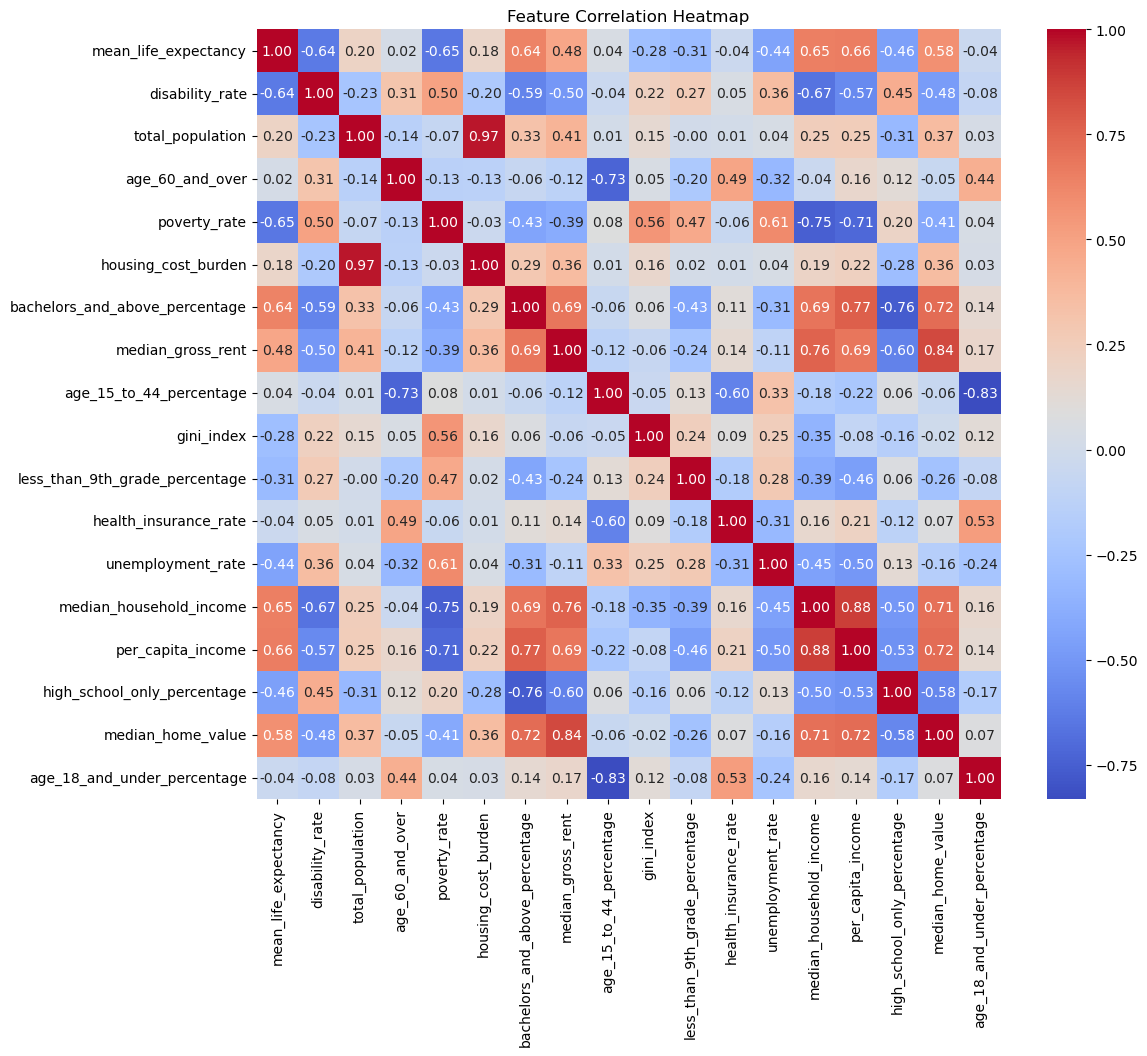

In [107]:
plt.figure(figsize=(12,10))
sns.heatmap(data = df[selected_features].corr(), annot= True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Heatmap")
plt.savefig('../outputs/correlation_heatmap.png', bbox_inches = 'tight')  # Save the heatmap
plt.show()

**Note: The following features seem to how strong positive correlation with the mean life expectancy: median_household_income (0.65), health_insurance_rate (0.65), bachelors_and_above_percentage (0.64), per_capita_income (0.66). Similarly, poverty_rate (-0.65) and disability_rate (-0.64) seem to show a strong negative correlation. Also, bachelors_and_above_percentage and median_household_income seems to be strongly correlated, suggesting counties with higher educational attainment tend to have higher household income.**